<a href="https://colab.research.google.com/github/doheeeeekim/Undergraduate_IndustrialDS/blob/main/%EC%82%B0%EC%97%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99_8%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C_%ED%92%80%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 #8주차 과제
>[과제] 랜덤포레스트를 이용하여 과제용 데이터(실제값 품질값이 제거된 데이터)를 이용하여 품질 수준 분류하기(나쁨, 좋음, 보통)
>> - 나쁨은 33% 미만, 보통은 33%~66%, 좋음은 66% 이상으로 분류할 것
>> - 일부 변수는 본인 의사에 맞게 수정해도 됨
>> - 변수 선택은 주관적으로 시행해도 됨(불필요하다고 생각되면 제거해도됨)
>> - 제출: 코드 링크 + 결과 스크린샷 또는 CSV파일#

## 1.수업용 데이터를 모두 trainx, trainy로 두고, 과제용 데이터를 testx로 두고 시행할 경우

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/My Drive/Colab Notebooks/Data" 
dt = pd.read_csv(data_path + '/cars_part_quality.csv')

Mounted at /content/drive


In [ ]:
print(dt)

             date_time   T1   T2   T3   T4   T5   T6   T7   T8   T9  T10  T11  \
0      2015-01-04 0:05  277  326  273  322  335  352  505  501  670  326  379   
1      2015-01-04 1:05  277  253  272  320  333  355  500  501  687  337  396   
2      2015-01-04 2:05  262  218  260  326  336  330  505  499  443  347  399   
3      2015-01-04 3:05  243  238  252  327  329  308  520  498  540  342  387   
4      2015-01-04 4:05  236  238  245  323  320  318  522  501  524  343  371   
...                ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
19995  2017-04-16 3:05  324  248  259  293  339  334  581  551  575  337  343   
19996  2017-04-16 4:05  256  253  262  333  321  325  593  602  523  337  334   
19997  2017-04-16 5:05  258  268  255  415  313  321  608  556  505  339  331   
19998  2017-04-16 6:05  260  261  237  313  325  320  622  570  516  335  334   
19999  2017-04-16 7:05  255  261  251  356  326  328  622  551  549  329  337   

       T12  T13  T14  T15  

In [ ]:
dt1= pd.read_csv(data_path + '/term_data_without_pred.csv')
dt1.head()

,date_time,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,observe1,observe2
0,2017-04-16 8:05,255,256,257,339,327,351,604,562,601,330,336,317,285,275,276,190.21,6.67
1,2017-04-16 9:05,206,264,251,347,352,375,569,574,661,343,338,327,285,282,285,170.96,7.56
2,2017-04-16 10:05,192,254,238,368,374,362,579,578,552,331,328,297,285,286,286,171.84,7.21
3,2017-04-16 11:05,256,236,217,350,350,345,589,580,833,338,341,213,284,287,284,174.71,8.78
4,2017-04-16 12:05,226,225,192,342,348,334,583,582,815,316,331,249,280,286,283,174.55,6.89


(array([2.000e+00, 8.000e+00, 2.700e+01, 6.500e+01, 1.730e+02, 3.720e+02,
        4.390e+02, 6.820e+02, 8.760e+02, 1.203e+03, 1.699e+03, 1.842e+03,
        2.138e+03, 2.283e+03, 2.267e+03, 2.461e+03, 1.913e+03, 1.139e+03,
        3.770e+02, 3.400e+01]),
 array([221. , 235.2, 249.4, 263.6, 277.8, 292. , 306.2, 320.4, 334.6,
        348.8, 363. , 377.2, 391.4, 405.6, 419.8, 434. , 448.2, 462.4,
        476.6, 490.8, 505. ]),
 <a list of 20 Patch objects>)

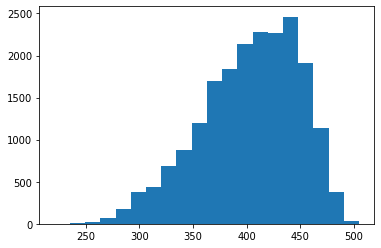

In [ ]:
# 품질 분포 확인하기
plt.hist(dt['quality'],bins=20)

In [ ]:
# 3개 라벨로 분리
# 33% 미만 (나쁨)
# 33% 이상 66% 미만 (보통)
# 66% 이상 (좋음)

dt = dt.sort_values(['quality']).reset_index(drop=True)
print(dt)
label = []
for i in range(len(dt)):
  if i < int(np.round(len(dt)*0.33)):
    label.append(0)
  elif i >= int(np.round(len(dt)*0.33)) and i< int(np.round(len(dt)*0.66)):
    label.append(1)
  else:
    label.append(2)

              date_time   T1   T2   T3   T4   T5   T6   T7   T8   T9  T10  \
0       2016-04-18 5:05  206  204  204  421  310  421  576  583  665  317   
1      2016-06-02 23:05  206  215  205  305  299  288  588  617  598  437   
2       2016-04-18 6:05  195  197  207  398  307  474  555  574  586  302   
3      2016-05-16 12:05  260  247  247  312  324  308  590  607  599  355   
4      2015-04-29 21:05  237  233  242  313  305  322  579  567  576  337   
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
19995  2015-02-17 23:05  309  311  303  337  327  340  391  403  418  394   
19996  2015-02-17 22:05  308  313  299  349  355  342  397  404  392  381   
19997   2015-02-18 0:05  299  300  300  348  338  341  403  397  368  409   
19998  2015-02-17 21:05  305  311  311  346  343  339  402  405  406  380   
19999   2015-02-18 1:05  293  282  290  355  357  357  414  391  308  408   

       T11  T12  T13  T14  T15  observe1  observe2  quality  
0      326  3

In [ ]:
label= pd.DataFrame(label)
counts = label.value_counts()
print(counts)

2    6800
0    6600
1    6600
dtype: int64


In [ ]:
trainx = dt.iloc[:,1:18]
col = trainx.columns
trainx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   T1        20000 non-null  int64  
 1   T2        20000 non-null  int64  
 2   T3        20000 non-null  int64  
 3   T4        20000 non-null  int64  
 4   T5        20000 non-null  int64  
 5   T6        20000 non-null  int64  
 6   T7        20000 non-null  int64  
 7   T8        20000 non-null  int64  
 8   T9        20000 non-null  int64  
 9   T10       20000 non-null  int64  
 10  T11       20000 non-null  int64  
 11  T12       20000 non-null  int64  
 12  T13       20000 non-null  int64  
 13  T14       20000 non-null  int64  
 14  T15       20000 non-null  int64  
 15  observe1  20000 non-null  float64
 16  observe2  20000 non-null  float64
dtypes: float64(2), int64(15)
memory usage: 2.6 MB


In [ ]:
testx=dt1.iloc[:,1:18]
col1=testx.columns
testx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9184 entries, 0 to 9183
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   T1        9184 non-null   int64  
 1   T2        9184 non-null   int64  
 2   T3        9184 non-null   int64  
 3   T4        9184 non-null   int64  
 4   T5        9184 non-null   int64  
 5   T6        9184 non-null   int64  
 6   T7        9184 non-null   int64  
 7   T8        9184 non-null   int64  
 8   T9        9184 non-null   int64  
 9   T10       9184 non-null   int64  
 10  T11       9184 non-null   int64  
 11  T12       9184 non-null   int64  
 12  T13       9184 non-null   int64  
 13  T14       9184 non-null   int64  
 14  T15       9184 non-null   int64  
 15  observe1  9184 non-null   float64
 16  observe2  9184 non-null   float64
dtypes: float64(2), int64(15)
memory usage: 1.2 MB


In [ ]:
#과제용데이터와 실습용데이터 합쳐주기
sum_x= pd.concat([trainx, testx],axis=0)
sum_x

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,observe1,observe2
0,206,204,204,421,310,421,576,583,665,317,326,305,220,210,206,158.84,7.54
1,206,215,205,305,299,288,588,617,598,437,383,404,246,202,191,165.98,7.59
2,195,197,207,398,307,474,555,574,586,302,282,308,200,205,211,159.45,8.97
3,260,247,247,312,324,308,590,607,599,355,339,353,215,202,203,154.51,9.45
4,237,233,242,313,305,322,579,567,576,337,346,353,230,228,225,159.95,7.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9179,257,258,266,379,381,358,449,386,461,354,350,349,234,254,252,157.47,7.33
9180,259,255,260,372,367,362,431,461,453,360,344,348,235,253,247,157.17,7.87
9181,260,254,263,364,349,352,429,425,446,348,360,345,256,257,247,155.00,7.65
9182,255,255,260,356,352,354,438,468,441,347,357,344,254,265,248,153.89,8.90


In [ ]:
#MinMaxScale 해주기
import sklearn.preprocessing 
scaler = sklearn.preprocessing.MinMaxScaler()
sum_x = scaler.fit_transform(sum_x)

In [ ]:
#다시 수업용, 과제용 데이터로 trainx, testx로 구분해주기
trainx=sum_x[:20000]
testx=sum_x[20000:]
trainy=label.to_numpy()

In [ ]:
print(trainx)

[[0.43606557 0.47368421 0.40595399 ... 0.44712182 0.22438392 0.52      ]
 [0.43606557 0.48976608 0.40730717 ... 0.4270415  0.34014267 0.52588235]
 [0.42404372 0.46345029 0.41001353 ... 0.45381526 0.23427367 0.68823529]
 ...
 [0.53770492 0.61403509 0.53585927 ... 0.57161981 0.62467575 0.30235294]
 [0.5442623  0.63011696 0.55074425 ... 0.57028112 0.60116732 0.51058824]
 [0.53114754 0.5877193  0.52232747 ... 0.57028112 0.66034371 0.57529412]]


#*랜덤포레스트*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators = 100, 
                              criterion = 'entropy',
                              max_depth = 12,
                              min_samples_leaf = 20,
                              min_samples_split = 20,
                              random_state = 0,
                              n_jobs = -1)

In [ ]:
model = RandomForestClassifier()

In [ ]:
trainy.shape

(20000, 1)

In [ ]:
trainy = trainy.reshape(-1)
trainy.shape

(20000,)

In [ ]:
model = model.fit(trainx, trainy)

In [ ]:
pred_train=model.predict(trainx)

In [ ]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(trainy, pred_train)
print(m)

[[6600    0    0]
 [   0 6600    0]
 [   0    0 6800]]


In [ ]:
pred_test=model.predict(testx)

In [ ]:
pred_test

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
pred_test=pd.DataFrame(pred_test)
pred_test.to_csv('Pred_test.csv')